## Author: Jesús Salazar Gómez, Costa Rica
## Course: Applied Data Science Capstone, week 4 and 5 (project), Coursera

## LinkedIn: https://www.linkedin.com/in/jesagocr/
## GitHub: https://github.com/jesagocr

## Table of contents:
* [Introduction, Business Problem](#Problem)
* [Data](#Data)

## Problem

In Costa Rica the Tourism is an important source of employment and generates indirectly a huge number of other jobs, it is a engine for the economy reaching up to 8.8% of the GDP and almost a 10% of the employment in the country. 
Then creating more atractive places to help the foraign people enjoy our country is a good idea, opening a business near a beach or in a community near to a beach could be a good business thanks the number of visits we have where 72% of people visit the beach or is looking for sun and beach.
Now the question for a group of businessmen who already have one restaurant in one of the most popular beaches and want to open a second one is where is a good place to open? Which other beaches are similar to the beach where we are located and how many restaurants exist there, how is the competition on those places. 
With the help of python we will try to answer this quesions and generate new insigths that will help the owners to take a decision

## Data 

Costa Rica has many beaches to visit, in this case we will scrape some pages to get info about these, their type, their features in order to understant which could be similar or what makes a beach more popular to develop venues near, also we will work with The Foursquare API to get info about the restaurants and the locals, the idea is to examine the most frequent restaurant and also what other venues there are to figure out the level of movement (economic activity) in the zone. A problem with the data or with the beaches in general is that some of them are far away of the economic center or the village because the idea is to be a relax and chill beach, but this happens because others are inside a conservation zone where there is no info about locals (venues) because they does not exist here, so we will have to try to explore other zones in the area.

In [5]:
# to read the data and do wrangling
from urllib.request import urlopen
from collections import defaultdict


# to work with the api
import json
import requests
import pandas as pd


# to work with the geolocalization data
!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

print('Libraries imported.')

You should consider upgrading via the 'c:\users\jesag\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\jesag\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.
Libraries imported.


In [1]:
# to read the data and do wrangling
from urllib.request import urlopen
from collections import defaultdict

# to work with the api
import json
import requests
import pandas as pd

# to work with the geolocalization data
#!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!pip install folium
import folium # map rendering library

from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


In [2]:
# reading the url
url = urlopen("https://es.wikipedia.org/wiki/Anexo:Playas_de_Costa_Rica")

In [3]:
content = str(url.read(), encoding='utf-8')
print(type(content))

<class 'str'>


In [4]:
print(content[8000:10000]) # the info I need has: <li><a href=" 

ipedia/commons/thumb/8/88/Cahuita.jpg/440px-Cahuita.jpg 2x" data-file-width="1600" data-file-height="1082" /></a>  <div class="thumbcaption"><div class="magnify"><a href="/wiki/Archivo:Cahuita.jpg" class="internal" title="Aumentar"></a></div>Playa Blanca en Cahuita.</div></div></div>
<ul><li><a href="/wiki/Refugio_Nacional_de_Fauna_Silvestre_Barra_del_Colorado" class="mw-redirect" title="Refugio Nacional de Fauna Silvestre Barra del Colorado">Playa Barra del Colorado</a></li>
<li><a href="/w/index.php?title=Playa_Bonita_(Lim%C3%B3n)&amp;action=edit&amp;redlink=1" class="new" title="Playa Bonita (Limón) (aún no redactado)">Playa Bonita</a></li>
<li><a href="/w/index.php?title=Playa_Cahuita_(Blanca)&amp;action=edit&amp;redlink=1" class="new" title="Playa Cahuita (Blanca) (aún no redactado)">Playa Cahuita (Blanca)</a></li>
<li><a href="/wiki/Playa_Chiquita" title="Playa Chiquita">Playa Chiquita</a></li>
<li><a href="/w/index.php?title=Punta_Cocles&amp;action=edit&amp;redlink=1" class="new

In [5]:
data = content.split('<li><a href="')

In [7]:
### need to understand the data
for d in data[:10]:
    print(d)

## the list of beaches start at index 1

/wiki/Refugio_Nacional_de_Fauna_Silvestre_Barra_del_Colorado" class="mw-redirect" title="Refugio Nacional de Fauna Silvestre Barra del Colorado">Playa Barra del Colorado</a></li>

/w/index.php?title=Playa_Bonita_(Lim%C3%B3n)&amp;action=edit&amp;redlink=1" class="new" title="Playa Bonita (Limón) (aún no redactado)">Playa Bonita</a></li>

/w/index.php?title=Playa_Cahuita_(Blanca)&amp;action=edit&amp;redlink=1" class="new" title="Playa Cahuita (Blanca) (aún no redactado)">Playa Cahuita (Blanca)</a></li>

/wiki/Playa_Chiquita" title="Playa Chiquita">Playa Chiquita</a></li>

/w/index.php?title=Punta_Cocles&amp;action=edit&amp;redlink=1" class="new" title="Punta Cocles (aún no redactado)">Punta Cocles</a></li>

/w/index.php?title=Playa_Gandoca&amp;action=edit&amp;redlink=1" class="new" title="Playa Gandoca (aún no redactado)">Playa Gandoca</a></li>

/w/index.php?title=Playa_Manzanillo_(Lim%C3%B3n)&amp;action=edit&amp;redlink=1" class="new" title="Playa Manzanillo (Limón) (aún no redactado)">

In [8]:
# a dict with info about which places have info (I guess because are popular) and which not is a good idea.
# Also, I am going to add more categories to the dataset so a dict is perfect

playas2 = defaultdict(dict)

for d in data[1:-1]:
    inicio = (d.find('">')+2)
    final = d.find('</')
    name = d[inicio:final]

    # it seems the most popular beaches are complete but the others are "aún no redactado"
    ini = d.find('aún no')

    if ini != -1:   # if "aún no redactado" = no info of the beach, it is possible is not a popular beach
        #playas2[name] = False
        playas2[name]['Info'] = False

    else:
        #playas2[name] = True
        playas2[name]['Info'] = True

In [9]:
# also this dict have more beaches with punta or puerto that I did not count before
playas2

defaultdict(dict,
            {'Playa Barra del Colorado': {'Info': True},
             'Playa Bonita': {'Info': False},
             'Playa Cahuita (Blanca)': {'Info': False},
             'Playa Chiquita': {'Info': True},
             'Punta Cocles': {'Info': False},
             'Playa Gandoca': {'Info': False},
             'Playa Manzanillo': {'Info': False},
             'Playa Moín': {'Info': False},
             'Playa Negra (Puerto Viejo)': {'Info': False},
             'Playa Negra (Cahuita)': {'Info': True},
             'Playa Pirikiki': {'Info': False},
             'Playa Portete': {'Info': False},
             'Playa Puerto Vargas': {'Info': False},
             'Playas Tortuguero': {'Info': True},
             'Playa Vizcaya': {'Info': False},
             'Playa Westfalia': {'Info': False},
             'Puerto Viejo de Talamanca': {'Info': True},
             'Punta Mona': {'Info': True},
             'Punta Uva': {'Info': False},
             'Playa Arbolito': {'Info

In [10]:
len(playas2.keys())

137

### A new web with more info to add categories
### There are 3 categories of beaches, use it to separete the places

In [11]:
#source = requests.get("https://www.govisitcostarica.co.cr/travelInfo/beaches/beaches-list.asp").text

In [12]:
#soup2 = BeautifulSoup(source, 'html.parser')

In [30]:
#for item in soup2.find_all('<div class="pageListContentRow">'): # I need this but I need more practice with BS, it seems it just 
    #print(item.text)                                            # works with tags and not other text
                                                                # better use another approach

In [13]:
#like this:
url2 = urlopen("https://www.govisitcostarica.co.cr/travelInfo/beaches/beaches-list.asp")

In [14]:
contenido = str(url2.read(), encoding='utf-8')

In [15]:
types = contenido.split('<div class="pageListContentRow">') #each list of beaches are listed in a column with the class"pageList..."

In [17]:
types[1]

'\r\n        <div class="pageListContentItem ListHeader"><a id="Surfing-Beaches">Surfing Beaches</a></div>\r\n        <div class="pageListContentItem ListHeader"><a id="Snorkeling-Beaches">Snorkeling Beach</a></div>\r\n    </div>\r\n\r\n    '

In [18]:
soup = BeautifulSoup(types[1], 'html.parser') # we splited the data and select the first column with data (index 1)
for d in soup.find_all('div'):                # this case it only have the categories  
    print(d.text)

Surfing Beaches
Snorkeling Beach


In [19]:
soup = BeautifulSoup(types[2], 'html.parser') # then select the second column or the second pageListContent with our data
count = 0 
cate_data = []
divider = []                                  # 2 index this case, the first div includes / covers all the beaches of 1 category 
                                              # but we can omit it and use the others div that represent just 1 beach
for d in soup.find_all('div'):                
    cate_data.append(d.text)
    
    if len(d.text) > 50:
        divider.append(count)
    count = count + 1

In [22]:
print(divider)
print(cate_data[:5])
print(cate_data[39:44])  


['Bahía Salinas CahuitaP.N. CahuitaRefugio CamaronalDominicalEl RobleEsterillos EsteEsterillos OesteGarzaJacóP.N. Marino las Baulas MalpaísManuel AntonioMarbellaMatapaloPavonesPlaya AvellanaPlaya Bahia BallenaPlaya BejucoPlaya CaletasPlaya CoyotePlaya Doña AnaPlaya GrandePlaya GuionesPlaya HermosaPlaya JunquillalPlaya LangostaPlaya NegraPlaya NosaraPlaya San MiguelPlaya ZancudoPuerto LimonPuerto SoleyPuerto Viejo de TalamancaQueposP. N. Santa RosaSanta TeresaTamarindo', 'Bahía Salinas ', 'Cahuita', 'P.N. Cahuita', 'Refugio Camaronal']
['\nRefugio Bahía JunquillalP.N. BallenaCahuitaP.N. CahuitaIsla del CañoP. N. Isla del CocoDrake BayIsla BallenaManuel AntonioManzanilloMontezumaGolfo de PapagayoPlaya CarrilloPlaya ChiquitaPlaya ConchalPlaya HermosaPlaya HerraduraPlaya OcotalPlaya Pan de AzucarPlaya PanamáPlaya PotreroPlaya UvitaPlaya ZancudoPuerto LimonPuerto Viejo de TalamancaSan JuanilloTortuga AbajoIsla Tortuga\n', 'Refugio Bahía Junquillal', 'P.N. Ballena', 'Cahuita', 'P.N. Cahuita'

In [26]:
surfing_b = cate_data[divider[0]+1:divider[1]]
snorkeling_b = cate_data[divider[1]+1:]

In [27]:
surfing_b

['Bahía Salinas ',
 'Cahuita',
 'P.N. Cahuita',
 'Refugio Camaronal',
 'Dominical',
 'El Roble',
 'Esterillos Este',
 'Esterillos Oeste',
 'Garza',
 'Jacó',
 'P.N. Marino las Baulas ',
 'Malpaís',
 'Manuel Antonio',
 'Marbella',
 'Matapalo',
 'Pavones',
 'Playa Avellana',
 'Playa Bahia Ballena',
 'Playa Bejuco',
 'Playa Caletas',
 'Playa Coyote',
 'Playa Doña Ana',
 'Playa Grande',
 'Playa Guiones',
 'Playa Hermosa',
 'Playa Junquillal',
 'Playa Langosta',
 'Playa Negra',
 'Playa Nosara',
 'Playa San Miguel',
 'Playa Zancudo',
 'Puerto Limon',
 'Puerto Soley',
 'Puerto Viejo de Talamanca',
 'Quepos',
 'P. N. Santa Rosa',
 'Santa Teresa',
 'Tamarindo']

In [28]:
snorkeling_b

['Refugio Bahía Junquillal',
 'P.N. Ballena',
 'Cahuita',
 'P.N. Cahuita',
 'Isla del Caño',
 'P. N. Isla del Coco',
 'Drake Bay',
 'Isla Ballena',
 'Manuel Antonio',
 'Manzanillo',
 'Montezuma',
 'Golfo de Papagayo',
 'Playa Carrillo',
 'Playa Chiquita',
 'Playa Conchal',
 'Playa Hermosa',
 'Playa Herradura',
 'Playa Ocotal',
 'Playa Pan de Azucar',
 'Playa Panamá',
 'Playa Potrero',
 'Playa Uvita',
 'Playa Zancudo',
 'Puerto Limon',
 'Puerto Viejo de Talamanca',
 'San Juanillo',
 'Tortuga Abajo',
 'Isla Tortuga']

In [29]:
soup = BeautifulSoup(types[3], 'html.parser')
for d in soup.find_all('div'):
    print(d.text)

Swimming Beaches



In [30]:
soup = BeautifulSoup(types[4], 'html.parser')
count2 = 0
another_cate = []

for d in soup.find_all('div'):

    if len(d.text) > 50:
        pass
  
    else: 
        another_cate.append(d.text)
        
    count2 = count2 + 1

280


In [32]:
another_cate[67:72] # other divs had more info but I do not need then, find where my list of beaches finishes and slice it in a new list

['Isla Tortuga', '', 'Tour de Aventura en Guanacaste', '', '7 Días y 6 Noches']

In [41]:
swimming_b = another_cate[:68] # the list with beaches ends at index 67

In [35]:
# creating a list of the beaches to check to match them and add the info to each beach

b2 = list(playas2.keys())
print(b2[:20])

['Playa Barra del Colorado', 'Playa Bonita', 'Playa Cahuita (Blanca)', 'Playa Chiquita', 'Punta Cocles', 'Playa Gandoca', 'Playa Manzanillo', 'Playa Moín', 'Playa Negra (Puerto Viejo)', 'Playa Negra (Cahuita)', 'Playa Pirikiki', 'Playa Portete', 'Playa Puerto Vargas', 'Playas Tortuguero', 'Playa Vizcaya', 'Playa Westfalia', 'Puerto Viejo de Talamanca', 'Punta Mona', 'Punta Uva', 'Playa Arbolito']
<class 'list'>


In [36]:
# I check if the beach in the list with categories appears on the dict (dataset) and add the info

ind_s = [] #if the beach appears then add the index to the list

for playa in swimming_b:
   
    for p in b2:
        
        if playa in p:
  
            ind_s.append(swimming_b.index(playa))
            playas2[p]['Swimming'] = True 

        else:
            cut = playa.split(' ')
            if cut[-1] in p:
                ind_s.append(swimming_b.index(playa))
                playas2[p]['Swimming'] = True 

ind_s = set(ind_s)

In [37]:
s_beaches_no = [ x for x in swimming_b if swimming_b.index(x) not in ind_s] 
print(len(swimming_b))
print(len(s_beaches_no)) # 18 beaches from 68 did not appear or the names are different ( some beaches can be called different)

68
18


In [38]:
s_beaches_no

['Isla del Caño',
 'Coronado',
 'Drake Bay',
 'Reserva Golfo Dulce',
 'Hacienda Pinilla',
 'Malpaís',
 'Paquera',
 'Parismina',
 'P. N. Piedras Blancas',
 'Playa Cativo',
 'Playa Pan de Azucar',
 'Playa Pinuela',
 'Puerto Jiménez',
 'Punta Banco',
 'Punta Leona',
 'Samara',
 'P. N. Santa Rosa',
 'Tortuga Abajo']

In [40]:
# I can add info manually but it takes more time, now just 14 of 68

playas2['Playa Mal País']['Swimming'] = True # Malpaís
playas2['Playa Sámara']['Swimming'] = True   # Samara 
playas2['Playa Blanca']['Swimming'] = True   # PUnta Leona
playas2['Playa Mantas']['Swimming'] = True   # Punta Leona

In [42]:
ind_surf = []

for playa in surfing_b:
    #print(playa)
    for p in b2:
        #print(p)
        #if playa_counter != playa :
        
        if playa in p:
            #print(playa)
            #total2 += 1
            ind_surf.append(surfing_b.index(playa))
            playas2[p]['Surfing'] = True
        else:
            cut = playa.split(' ')
            if cut[-1] in p:
                ind_surf.append(surfing_b.index(playa))
                playas2[p]['Surfing'] = True 

ind_surf = set(ind_surf)

In [43]:
sur_beaches_no = [ x for x in surfing_b if surfing_b.index(x) not in ind_surf] 
print(len(surfing_b))
print(len(sur_beaches_no))

38
6


In [44]:
sur_beaches_no

['Esterillos Oeste',
 'Malpaís',
 'Playa Caletas',
 'Puerto Limon',
 'Quepos',
 'P. N. Santa Rosa']

In [45]:
playas2['Playa Mal País']['Surfing'] = True # Malpaís
playas2['Playa Esterillos']['Surfing'] = True

In [46]:
ind_sn = []

for playa in snorkeling_b:
    for p in b2:
        if playa in p:
            ind_sn.append(snorkeling_b.index(playa))
            playas2[p]['Snorkeling'] = True
        else:
            cut = playa.split(' ')
            if cut[-1] in p:
                ind_sn.append(snorkeling_b.index(playa))
                playas2[p]['Snorkeling'] = True 

ind_sn = set(ind_sn)

In [47]:
sn_beaches_no = [ x for x in snorkeling_b if snorkeling_b.index(x) not in ind_sn] 
print(len(snorkeling_b))
print(len(sn_beaches_no))

28
5


In [48]:
sn_beaches_no

['Isla del Caño',
 'Drake Bay',
 'Playa Pan de Azucar',
 'Puerto Limon',
 'Tortuga Abajo']

In [68]:
playas2['Playa Bahía Drake']['Snorkeling'] = True

## Trying to add more features

In [50]:
# it is interesting, I try urlopen and get 403 forbidden but Beautiful was able to

source = requests.get("https://goplaya.cr/index.php/search_controller/buscar?latitud=9.935607&longitud=-84.1833856&busqueda=todas&filtros%5B%5D=81&radio=350#sa").text
soup = BeautifulSoup(source, 'html.parser')

In [51]:
info = []
for line in soup.find_all('div'):
    if line.h3 != None:
        #print(line.h3)
        info.append(line.h3)

In [52]:
nocturnal = []
for i in range(len(info)):
    nocturnal.append(info[i].text)

nocturnal = set(nocturnal) # the names are duplicate or even more so I have to delete duplicate values with set
nocturnal = list(nocturnal) #
nocturnal

['  Puerto Viejo, Limón',
 '  Hermosa (El Coco)',
 '  Montezuma',
 '  Tamarindo',
 '  Santa Teresa',
 '  Manuel Antonio',
 '  Malpaís',
 '  Dominical',
 '  El Coco',
 '  Jacó']

In [53]:
ind_n = []

for playa in nocturnal:
    for p in b2: 
        if playa in p:
            ind_n.append(nocturnal.index(playa))
            playas2[p]['Nocturnal'] = True
        else:
            cut = playa.split(' ')
            if cut[-1] in p:
                ind_n.append(nocturnal.index(playa))
                playas2[p]['Nocturnal'] = True 

ind_n = set(ind_n)

In [54]:
no_beaches_no = [ x for x in nocturnal if nocturnal.index(x) not in ind_n] 
print(len(nocturnal))
print(len(no_beaches_no))

10
2


In [55]:
no_beaches_no

['  Hermosa (El Coco)', '  Malpaís']

In [57]:
playas2['Playa Mal País']['Nocturnal'] = True # Malpaís

In [58]:
source2 = requests.get("https://goplaya.cr/index.php/search_controller/buscar?latitud=9.935607&longitud=-84.1833856&busqueda=todas&filtros%5B%5D=9&radio=350#sa").text
soup2 = BeautifulSoup(source2, 'html.parser')

In [59]:
info2 = []
for line in soup2.find_all('div'):
    if line.h3 != None:
        info2.append(line.h3)

In [60]:
white_sand = []
for i in range(len(info2)):
    white_sand.append(info2[i].text.strip())

white_sand = set(white_sand)
white_sand = list(white_sand)
white_sand

['Biesanz',
 'Blanca (Península de Nicoya)',
 'Tropical',
 'Cocles',
 'Pochotes (Junquillal)',
 'Cuevas',
 'Punta Cahuita',
 'Soley',
 'Cabo Blanco',
 'Lagartillo',
 'Chiquita',
 'Corona',
 'Blanca, Punta Leona',
 'Blanca (Punta Morales)',
 'Langosta',
 'Carrillo',
 'San Juanillo',
 'Puerto Vargas, Cahuita',
 'Flamingo',
 'Blanca (Junquillal)',
 'Cuarzo',
 'Carmen',
 'Avellanas',
 'Nacascolo',
 'Cocal del Peñón',
 'Pleito',
 'Bonita',
 'Blanca (Santa Rosa)',
 'Calzón de Pobre',
 'Bonita (Pinilla)',
 'Gemelas',
 'Isla Tortuga tours',
 'Blanca, Cahuita',
 'Quesera',
 'Barrigona',
 'Macaya',
 'Blanca (Papagayo)',
 'Montezuma',
 'Penca (Punta Cacique)',
 'Punta Uva',
 'Ventanas (Guanacaste)',
 'Penca (Flamingo)',
 'Espadilla Sur',
 'Garza',
 'Grande',
 'Punta Cocles',
 'Puerto Viejo (Conchal)',
 'Coyote',
 'Negra',
 'Mansita',
 'Buena',
 'Playitas (Manuel Antonio)',
 'Tamarindo',
 'Espadilla',
 'Jicote',
 'Guiones, Nosara',
 'Callejones',
 'Pelada',
 'Bahía Junquillal',
 'Roble (Conchal)',

In [61]:
ind_ws = []

for playa in white_sand:
    for p in b2:
        if playa in p:
            ind_ws.append(white_sand.index(playa))
            playas2[p]['White_S'] = True
        else:
            cut = playa.split(' ')
            if cut[-1] in p:
                ind_ws.append(white_sand.index(playa))
                playas2[p]['White_S'] = True 

ind_ws = set(ind_ws)

In [63]:
ws_beaches_no = [ x for x in white_sand if white_sand.index(x) not in ind_ws] 
print(len(white_sand))
print(len(ws_beaches_no))

82
39


In [64]:
ws_beaches_no

['Biesanz',
 'Blanca (Península de Nicoya)',
 'Tropical',
 'Pochotes (Junquillal)',
 'Cuevas',
 'Lagartillo',
 'Corona',
 'Blanca, Punta Leona',
 'Blanca (Punta Morales)',
 'Blanca (Junquillal)',
 'Cuarzo',
 'Cocal del Peñón',
 'Blanca (Santa Rosa)',
 'Calzón de Pobre',
 'Bonita (Pinilla)',
 'Gemelas',
 'Isla Tortuga tours',
 'Quesera',
 'Macaya',
 'Penca (Punta Cacique)',
 'Ventanas (Guanacaste)',
 'Penca (Flamingo)',
 'Puerto Viejo (Conchal)',
 'Mansita',
 'Playitas (Manuel Antonio)',
 'Jicote',
 'Callejones',
 'Roble (Conchal)',
 'Peñón',
 'Manchas',
 'Hermosa (Santa Teresa)',
 'Cabuyal',
 'Zapotillal (Minas)',
 'Muertos',
 'Punta El Madero',
 'Honda',
 'Rajadita',
 'Pilas',
 'Malpaís']

In [65]:
playas2['Playa Mal País']['White_S'] = True # Malpaís
playas2['Playa Blanca']['White_S'] = True   # PUnta Leona

## now I am going to add the location of each beach to be able to use the foursquare API

In [81]:
# based on the wikipedia page  

limon = b2[:19]
guanacaste = b2[19:87]
puntarenas = b2[87:]

In [87]:

for beach in b2[:70]:
    geolocator = Nominatim(user_agent="crb_explorer_js")

    if beach in limon:
        address = beach+", Limón, Costa Rica"
        #print(address)

    if beach in guanacaste:
        address = beach+", Guanacaste, Costa Rica"
        #print(address)

    if beach in puntarenas:
        address = beach+", Puntarenas, Costa Rica"
        #print(address)

    location = geolocator.geocode(address)

    if location == None:
        playas2[beach]['lati'] = None
        playas2[beach]['long'] = None
        
    else:
        playas2[beach]['lati'] = location.latitude
        playas2[beach]['long'] = location.longitude

In [89]:
for beach in b2[70:]:
    geolocator = Nominatim(user_agent="cr_explorer_js")

    if beach in limon:
        address = beach+", Limón, Costa Rica"
        #print(address)

    if beach in guanacaste:
        address = beach+", Guanacaste, Costa Rica"
        #print(address)

    if beach in puntarenas:
        address = beach+", Puntarenas, Costa Rica"
        #print(address)

    location = geolocator.geocode(address)

    if location == None:
        playas2[beach]['lati'] = None
        playas2[beach]['long'] = None
        
    else:
        playas2[beach]['lati'] = location.latitude
        playas2[beach]['long'] = location.longitude

In [100]:
latitudes = []

for beach in b2:
    if playas2[beach]['lati'] == None:
        latitudes.append(beach)

In [105]:
print(len(latitudes))
print(latitudes)

35
['Playa Barra del Colorado', 'Playa Cahuita (Blanca)', 'Playa Negra (Puerto Viejo)', 'Playa Pirikiki', 'Playa Puerto Vargas', 'Playa Arbolito', 'Playa Azul (Jurel)', 'Playa Buena Vista', 'Playa Carbón', 'Playa Carmen', 'Playa Cóncava', 'Playa Gringo', 'Playa Mal País', 'Playa Manzanillo (Costa Rica)', 'Playa Nabos', 'Playa Nancite', 'Playa Nubes', 'Playa Panamá (Chrorotega)', 'Playa Pietra', 'Playa Pochote (Papagayo)', 'Playa Real y Roble', 'Playa Santa Teresa', 'Playa Prieta (Papagayo)', 'Playa Pochote (Salinas)', 'Balnerario Puntarenas', 'Playa Boca Vieja', 'Playa Cabo Blanco', 'Playa de Arco', 'Playa de Doña Ana', 'Playa Garza (Boca Brava)', 'Playa Isla Damas', 'Playa Palo Seco', 'Playa Pógeres', 'Playa Quizales', 'Playa San Josecito (Golfito)']


In [107]:
# let's try without the province 

for beach in latitudes:
    geolocator = Nominatim(user_agent="beachesCR_explorer")

    location = geolocator.geocode(address)

    if location == None:
        playas2[beach]['lati'] = None
        playas2[beach]['long'] = None
        
    else:
        playas2[beach]['lati'] = location.latitude
        playas2[beach]['long'] = location.longitude

In [108]:
latitudes2 = []

for beach in b2:
    if playas2[beach]['lati'] == None:
        latitudes2.append(beach)

print(len(latitudes2))
print(latitudes2)

0
[]


In [180]:
df = pd.DataFrame(playas2)
df.head()

,Playa Barra del Colorado,Playa Bonita,Playa Cahuita (Blanca),Playa Chiquita,Punta Cocles,Playa Gandoca,Playa Manzanillo,Playa Moín,Playa Negra (Puerto Viejo),Playa Negra (Cahuita),...,Playa San Josecito (Golfito),Playa Savegre,Playa Sombrero,Playa Tamales,Playa Tambor,Playa Tárcoles,Playa Tivives,Playa Tortuga,Playa Uvita,Playa Zancudo
Info,True,False,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False
Swimming,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Surfing,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
lati,8.51584,10.0099,8.51584,9.6374,9.64528,9.59989,9.63376,10.0099,8.51584,9.74067,...,8.51584,9.36369,8.41559,8.45534,9.74571,9.75939,9.92122,9.77325,9.15531,8.51584
long,-83.1364,-83.0635,-83.1364,-82.7037,-82.7176,-82.6071,-82.6574,-83.0635,-83.1364,-82.8504,...,-83.1364,-84.0706,-83.2802,-83.2805,-84.9885,-84.628,-84.7149,-84.8954,-83.7574,-83.1364


In [181]:
df = df.transpose()
df.head()

,Info,Swimming,Surfing,lati,long,White_S,Snorkeling,Nocturnal
Playa Barra del Colorado,True,True,True,8.51584,-83.1364,NaN,NaN,NaN
Playa Bonita,False,True,True,10.0099,-83.0635,True,NaN,NaN
Playa Cahuita (Blanca),False,True,True,8.51584,-83.1364,True,True,NaN
Playa Chiquita,True,True,True,9.6374,-82.7037,True,True,NaN
Punta Cocles,False,True,True,9.64528,-82.7176,True,NaN,NaN


In [183]:
#df['White_S'] = df['White_S'].fillna(False)
#df['Snorkeling'] = df['Snorkeling'].fillna(False)
#df['Nocturnal'] = df['Nocturnal'].fillna(False)

# or fot the entire df
df = df.fillna(False)
df.head()

,Info,Swimming,Surfing,lati,long,White_S,Snorkeling,Nocturnal
Playa Barra del Colorado,True,True,True,8.515841,-83.136367,False,False,False
Playa Bonita,False,True,True,10.009861,-83.063460,True,False,False
Playa Cahuita (Blanca),False,True,True,8.515841,-83.136367,True,True,False
Playa Chiquita,True,True,True,9.637403,-82.703669,True,True,False
Punta Cocles,False,True,True,9.645276,-82.717563,True,False,False


In [184]:
df.reset_index(inplace=True)
df.head()

,index,Info,Swimming,Surfing,lati,long,White_S,Snorkeling,Nocturnal
0,Playa Barra del Colorado,True,True,True,8.515841,-83.136367,False,False,False
1,Playa Bonita,False,True,True,10.009861,-83.063460,True,False,False
2,Playa Cahuita (Blanca),False,True,True,8.515841,-83.136367,True,True,False
3,Playa Chiquita,True,True,True,9.637403,-82.703669,True,True,False
4,Punta Cocles,False,True,True,9.645276,-82.717563,True,False,False


In [185]:
df.rename({'index':'Beaches'}, axis=1, inplace=True)
df.head()

,Beaches,Info,Swimming,Surfing,lati,long,White_S,Snorkeling,Nocturnal
0,Playa Barra del Colorado,True,True,True,8.515841,-83.136367,False,False,False
1,Playa Bonita,False,True,True,10.009861,-83.063460,True,False,False
2,Playa Cahuita (Blanca),False,True,True,8.515841,-83.136367,True,True,False
3,Playa Chiquita,True,True,True,9.637403,-82.703669,True,True,False
4,Punta Cocles,False,True,True,9.645276,-82.717563,True,False,False


In [168]:
#df.to_csv('beaches.csv')

In [2]:
geolocator = Nominatim(user_agent="beachesCR_explorer")
address = "Alajuela, San Jose, Costa Rica"
location = geolocator.geocode(address)
print(location)

Alajuela, Cantón Alajuela, Provincia Alajuela, 20101, Costa Rica


In [3]:
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

10.0173148 -84.2132869


In [155]:
map_beaches = folium.Map(location=[latitude, longitude], zoom_start=8 )

for lat, lng, beach in zip(df['lati'], df['long'], df['Beaches']):
    label = '{}'.format(beach)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='Yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html=False).add_to(map_beaches)  
    
map_beaches

In [148]:
#playa ocotal does not have the correct cordenates, lets change them
playas2['Playa Ocotal']['lati'] = 10.54616
playas2['Playa Ocotal']['long'] = -85.72245
playas2['Playa Ocotal']

{'Info': False,
 'Swimming': True,
 'Surfing': True,
 'Snorkeling': True,
 'lati': 10.54616,
 'long': -85.72245}

In [ ]:
# I know the number of venues for a beach is less than the number of venues in a capital city and even less when speaking about Toronto or New York, that is why I am going to add data not just from 500 meters around the location, I am going to use 1000 meters

## all I need to continue tomorrow without loading the data again

In [3]:
df2 = pd.read_csv('beaches.csv',index_col=1, encoding='utf-8')
df2.head()

,Unnamed: 0,Info,Swimming,Surfing,lati,long,White_S,Snorkeling,Nocturnal
Beaches,,,,,,,,,
Playa Barra del Colorado,0,True,True,True,8.515841,-83.136367,False,False,False
Playa Bonita,1,False,True,True,10.009861,-83.063460,True,False,False
Playa Cahuita (Blanca),2,False,True,True,8.515841,-83.136367,True,True,False
Playa Chiquita,3,True,True,True,9.637403,-82.703669,True,True,False
Punta Cocles,4,False,True,True,9.645276,-82.717563,True,False,False


In [4]:
columns = df2.columns
columns

Index(['Unnamed: 0', 'Info', 'Swimming', 'Surfing', 'lati', 'long', 'White_S',
       'Snorkeling', 'Nocturnal'],
      dtype='object')

In [83]:
col_ind = [2,3,6,7,8]

In [84]:
# lets try to do some plot to add to the report
%matplotlib inline 

import matplotlib.pyplot as plt 

In [85]:
names = []
for column in range(len(columns)):
    if column in col_ind:
        names.append(columns[column])
names

['Swimming', 'Surfing', 'White_S', 'Snorkeling', 'Nocturnal']

In [46]:
qt = []
for i in col_ind:
    qt.append(df2[columns[i]].sum())
qt

[137, 137, 48, 27, 10]

<BarContainer object of 5 artists>

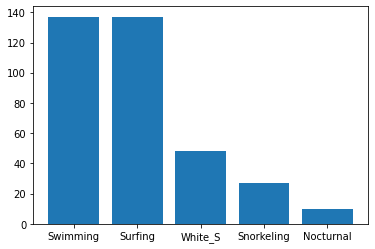

In [50]:
plt.bar(names, qt)


In [69]:
caribe = df2.index.to_list()[:19]
pacific_cs = df2.index.to_list()[87:]
pacific_n = df2.index.to_list()[19:87]

In [74]:
y = [len(caribe), len(pacific_cs), len(pacific_n)]
x = ['caribe', 'pacific_cs', 'pacific_n']

<BarContainer object of 3 artists>

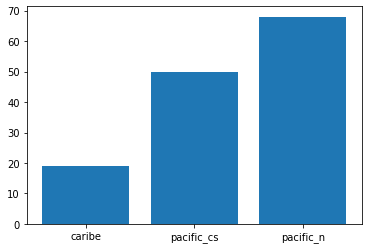

In [75]:
plt.bar(x,y)

In [101]:
df2.reset_index(inplace=True)

In [121]:
df2.head()

,Beaches,Unnamed: 0,Info,Swimming,Surfing,lati,long,White_S,Snorkeling,Nocturnal
0,Playa Barra del Colorado,0,True,True,True,8.515841,-83.136367,False,False,False
1,Playa Bonita,1,False,True,True,10.009861,-83.063460,True,False,False
2,Playa Cahuita (Blanca),2,False,True,True,8.515841,-83.136367,True,True,False
3,Playa Chiquita,3,True,True,True,9.637403,-82.703669,True,True,False
4,Punta Cocles,4,False,True,True,9.645276,-82.717563,True,False,False


In [130]:

def count_b(df,zonas):
    count = 0
  
    for i in range(10):     #(df.shape[0]):
        p = df.iloc[i,0]
        #print(p)
        if str(p) in zonas:
            print('y')
            #value = df.iloc[i,7]
            #print(value)
            #if value == True:
                #count = count + 1
    return count

In [118]:
caribe

['Playa Barra del Colorado',
 'Playa Bonita',
 'Playa Cahuita (Blanca)',
 'Playa Chiquita',
 'Punta Cocles',
 'Playa Gandoca',
 'Playa Manzanillo',
 'Playa Moín',
 'Playa Negra (Puerto Viejo)',
 'Playa Negra (Cahuita)',
 'Playa Pirikiki',
 'Playa Portete',
 'Playa Puerto Vargas',
 'Playas Tortuguero',
 'Playa Vizcaya',
 'Playa Westfalia',
 'Puerto Viejo de Talamanca',
 'Punta Mona',
 'Punta Uva']

In [131]:
count_b(df2, pacific_n)

0

In [135]:
df_ws = df2[df2['White_S']==True]
df_ws

,Beaches,Unnamed: 0,Info,Swimming,Surfing,lati,long,White_S,Snorkeling,Nocturnal
1,Playa Bonita,1,False,True,True,10.009861,-83.063460,True,False,False
2,Playa Cahuita (Blanca),2,False,True,True,8.515841,-83.136367,True,True,False
3,Playa Chiquita,3,True,True,True,9.637403,-82.703669,True,True,False
4,Punta Cocles,4,False,True,True,9.645276,-82.717563,True,False,False
6,Playa Manzanillo,6,False,True,True,9.633761,-82.657358,True,True,False
8,Playa Negra (Puerto Viejo),8,False,True,True,8.515841,-83.136367,True,False,False
9,Playa Negra (Cahuita),9,True,True,True,9.740670,-82.850424,True,True,False
18,Punta Uva,18,False,True,True,9.640909,-82.686332,True,False,False
20,Playa Avellanas,20,False,True,True,10.229295,-85.837797,True,False,False
22,Playa Bahía Junquillal,22,False,True,True,10.969830,-85.688038,True,True,False


In [136]:
df_noc = df2[df2['Nocturnal'] == True]
df_noc

,Beaches,Unnamed: 0,Info,Swimming,Surfing,lati,long,White_S,Snorkeling,Nocturnal
41,Playas del Coco,41,True,True,True,10.557995,-85.692262,False,True,True
55,Playa Mal País,55,False,True,True,8.515841,-83.136367,True,False,True
79,Playa Santa Teresa,79,False,True,True,8.515841,-83.136367,True,False,True
85,Playa Tamarindo,85,True,True,True,10.300854,-85.841548,True,False,True
103,Playa Dominical,103,True,True,True,9.250937,-83.864184,False,False,True
104,Playa Dominicalito,104,False,True,True,9.237396,-83.845731,False,False,True
111,Playa Jacó,111,True,True,True,9.600515,-84.621062,False,False,True
114,Playa Mata de Limón,114,False,True,True,9.932353,-84.721448,True,False,True
116,Playas Manuel Antonio,116,True,True,True,9.976200,-84.827582,True,True,True
118,Playa Montezuma,118,False,True,True,9.657497,-85.064285,True,True,True


In [137]:
df_snork = df2[df2['Snorkeling'] == True]
df_snork

,Beaches,Unnamed: 0,Info,Swimming,Surfing,lati,long,White_S,Snorkeling,Nocturnal
2,Playa Cahuita (Blanca),2,False,True,True,8.515841,-83.136367,True,True,False
3,Playa Chiquita,3,True,True,True,9.637403,-82.703669,True,True,False
6,Playa Manzanillo,6,False,True,True,9.633761,-82.657358,True,True,False
9,Playa Negra (Cahuita),9,True,True,True,9.740670,-82.850424,True,True,False
16,Puerto Viejo de Talamanca,16,True,True,True,9.656494,-82.753565,False,True,False
22,Playa Bahía Junquillal,22,False,True,True,10.969830,-85.688038,True,True,False
34,Playa Carrillo,34,True,True,True,9.868196,-85.499078,True,True,False
36,Playa Conchal,36,True,True,True,10.401501,-85.805542,True,True,False
41,Playas del Coco,41,True,True,True,10.557995,-85.692262,False,True,True
47,Playa Hermosa,47,True,True,True,10.574502,-85.674186,False,True,False


In [143]:
def create_map(dframe):

    map = folium.Map(location=[latitude, longitude], zoom_start=8 )

    for lat, lng, beach in zip(dframe['lati'], dframe['long'], dframe['Beaches']):
        label = '{}'.format(beach)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=6,
            popup=label,
            color='Green',
            fill=True,
            fill_color='#1186cc',
            fill_opacity=0.6,
            parse_html=False).add_to(map)  
        
    return map

In [147]:
create_map(df_noc)

In [145]:
create_map(df_ws)

In [146]:
create_map(df_snork)

In [4]:
df2 = pd.read_csv('beaches.csv',index_col=1, encoding='utf-8')
df2.head()

,Unnamed: 0,Info,Swimming,Surfing,lati,long,White_S,Snorkeling,Nocturnal
Beaches,,,,,,,,,
Playa Barra del Colorado,0,True,True,True,8.515841,-83.136367,False,False,False
Playa Bonita,1,False,True,True,10.009861,-83.063460,True,False,False
Playa Cahuita (Blanca),2,False,True,True,8.515841,-83.136367,True,True,False
Playa Chiquita,3,True,True,True,9.637403,-82.703669,True,True,False
Punta Cocles,4,False,True,True,9.645276,-82.717563,True,False,False


In [62]:
columns = df2.columns
columns

Index(['Unnamed: 0', 'Beaches', 'Info', 'Swimming', 'Surfing', 'lati', 'long',
       'White_S', 'Snorkeling', 'Nocturnal'],
      dtype='object')

In [8]:
df2 = df2[columns[1:]].transpose()
playas = df2.to_dict()

In [174]:
#playas

In [9]:
playas['Playa Barra del Colorado']

{'Info': True,
 'Swimming': True,
 'Surfing': True,
 'lati': 8.51584085,
 'long': -83.13636745062689,
 'White_S': False,
 'Snorkeling': False,
 'Nocturnal': False}

## until here

In [18]:
lits_p = list(playas.keys())
len(lits_p)
lits_p[:10]

['Playa Barra del Colorado',
 'Playa Bonita',
 'Playa Cahuita (Blanca)',
 'Playa Chiquita',
 'Punta Cocles',
 'Playa Gandoca',
 'Playa Manzanillo',
 'Playa Moín',
 'Playa Negra (Puerto Viejo)',
 'Playa Negra (Cahuita)']

In [217]:
# one degree in latitute and longitude is almost 110 km
# a small change in the latitute of 0.09 is almsot one 1km
110 * 0.009
# that is the small change I am going to apply in order to explore more places in with the API and not just the beach 

0.9899999999999999

In [19]:

change = 0.009

for beach in lits_p:
    newLoc = []
    #the first case I am going to chage the lat
    lati = playas[beach]['lati']
    long = playas[beach]['long']


    newLoc.append((lati-change, long))
    newLoc.append((lati+change, long))
    newLoc.append((lati, long-change))
    newLoc.append((lati, long+change))

    #print(newLoc)
    playas[beach]['other_info'] = newLoc

In [20]:
len(playas['Playa Barra del Colorado']['other_info'])

4

In [21]:
extra_explore = []
for b in lits_p:
    l = playas[b]['other_info']
    for c in l:
        #print(l)
        extra_explore.append(c)

In [22]:
len(extra_explore)

548

In [23]:
extra_explore[:10]

[(8.50684085, -83.13636745062689),
 (8.52484085, -83.13636745062689),
 (8.51584085, -83.14536745062689),
 (8.51584085, -83.12736745062689),
 (10.0008609, -83.06345966834189),
 (10.0188609, -83.06345966834189),
 (10.0098609, -83.07245966834189),
 (10.0098609, -83.05445966834189),
 (8.50684085, -83.13636745062689),
 (8.52484085, -83.13636745062689)]

In [24]:
ls_lt = []
ls_ln = []

for l in range(len(extra_explore)):
    ls_lt.append(extra_explore[l][0])
    ls_ln.append(extra_explore[l][1])

In [25]:
len(ls_lt)

548

In [278]:
df2

Beaches,Playa Barra del Colorado,Playa Bonita,Playa Cahuita (Blanca),Playa Chiquita,Punta Cocles,Playa Gandoca,Playa Manzanillo,Playa Moín,Playa Negra (Puerto Viejo),Playa Negra (Cahuita),...,Playa San Josecito (Golfito),Playa Savegre,Playa Sombrero,Playa Tamales,Playa Tambor,Playa Tárcoles,Playa Tivives,Playa Tortuga,Playa Uvita,Playa Zancudo
Info,True,False,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False
Swimming,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Surfing,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
lati,8.51584,10.0099,8.51584,9.6374,9.64528,9.59989,9.63376,10.0099,8.51584,9.74067,...,8.51584,9.36369,8.41559,8.45534,9.74571,9.75939,9.92122,9.77325,9.15531,8.51584
long,-83.1364,-83.0635,-83.1364,-82.7037,-82.7176,-82.6071,-82.6574,-83.0635,-83.1364,-82.8504,...,-83.1364,-84.0706,-83.2802,-83.2805,-84.9885,-84.628,-84.7149,-84.8954,-83.7574,-83.1364
White_S,False,True,True,True,True,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
Snorkeling,False,False,True,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,True,True
Nocturnal,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
df2 = pd.read_csv('beaches.csv',encoding='utf-8')
df2.head()

,Unnamed: 0,Beaches,Info,Swimming,Surfing,lati,long,White_S,Snorkeling,Nocturnal
0,0,Playa Barra del Colorado,True,True,True,8.515841,-83.136367,False,False,False
1,1,Playa Bonita,False,True,True,10.009861,-83.063460,True,False,False
2,2,Playa Cahuita (Blanca),False,True,True,8.515841,-83.136367,True,True,False
3,3,Playa Chiquita,True,True,True,9.637403,-82.703669,True,True,False
4,4,Punta Cocles,False,True,True,9.645276,-82.717563,True,False,False


In [39]:
map_explore2 = folium.Map(location=[latitude, longitude], zoom_start=8 )

for lat, lng in zip(ls_lt, ls_ln):
    #print(lat, lng)
    #label = '{}'.format(beach)
    #label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        #popup=label,
        color='Red',
        fill=True,
        fill_color='#30115cc',
        fill_opacity=0.5).add_to(map_explore2)  

for lat, lng, beach in zip(df2['lati'], df2['long'], df2['Beaches']):
    label = '{}'.format(beach)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='Yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html=False).add_to(map_explore) 
    
map_explore

## Delete

In [9]:
change = 0.009

for beach in lits_p:
    newLoc = []
    #the first case I am going to chage the lat
    lati = playas[beach]['lati']
    long = playas[beach]['long']

    if long > -83.6:
         newLoc.append((lati, long-change))

    else:     
        newLoc.append((lati, long+change))

    #newLoc.append((lati-change, long))
    #newLoc.append((lati+change, long))
    #print(newLoc)
    playas[beach]['other_info'] = newLoc

In [11]:
playas['Playa Barra del Colorado']['other_info']

[(8.51584085, -83.14536745062689)]

In [10]:
print(playas['Playa Barra del Colorado']['lati'])
print(playas['Playa Barra del Colorado']['long'])

8.51584085
-83.13636745062689


In [14]:
extra_explore = []
for b in lits_p:
    l = playas[b]['other_info']
    #print(l)
    #for c in l:
        #print(l)
    extra_explore.append(l)

In [15]:
print(len(extra_explore))
extra_explore[:10]

137


[[(8.51584085, -83.14536745062689)],
 [(10.0098609, -83.07245966834189)],
 [(8.51584085, -83.14536745062689)],
 [(9.637402699999999, -82.71266899999999)],
 [(9.64527615, -82.72656313437658)],
 [(9.59988715, -82.6160751340197)],
 [(9.63376115, -82.66635846713483)],
 [(10.0098609, -83.07245966834189)],
 [(8.51584085, -83.14536745062689)],
 [(9.7406696, -82.8594235)]]

In [28]:
ls_lt = []
ls_ln = []

#ind = 0
for l in extra_explore:
    #print(l[0][0])
    ls_lt.append(l[0][0])
    ls_ln.append(l[0][1])
    #ind += 1

In [29]:
ls_ln[:10]

[-83.14536745062689,
 -83.07245966834189,
 -83.14536745062689,
 -82.71266899999999,
 -82.72656313437658,
 -82.6160751340197,
 -82.66635846713483,
 -83.07245966834189,
 -83.14536745062689,
 -82.8594235]

In [21]:
df2 = pd.read_csv('beaches.csv',encoding='utf-8')

In [30]:
map_explore = folium.Map(location=[latitude, longitude], zoom_start=8 )

for lat, lng in zip(ls_lt, ls_ln):
    #print(lat, lng)
    #label = '{}'.format(beach)
    #label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        #popup=label,
        color='Red',
        fill=True,
        fill_color='#30115cc',
        fill_opacity=0.5).add_to(map_explore)  

for lat, lng, beach in zip(df2['lati'], df2['long'], df2['Beaches']):
    label = '{}'.format(beach)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='Yellow',
        fill=True,
        fill_color='#1186cc',
        fill_opacity=0.6,
        parse_html=False).add_to(map_explore) 
    
map_explore

In [26]:
a = list(df2['lati'])

In [27]:
b = ls_lt
b

[8.51584085,
 10.0098609,
 8.51584085,
 9.637402699999999,
 9.64527615,
 9.59988715,
 9.63376115,
 10.0098609,
 8.51584085,
 9.7406696]

## Until here (delete)

## Now the Foursquare API to add more info 

In [27]:
CLIENT_ID = 'RZUGC5ZFLANLGWB5FEH10415WEQNYUCJGFHLA0FQQFD1GX0N' # your Foursquare ID
CLIENT_SECRET = 'BNAKVWIOXPGUKLBF3FMSANLL5USV4DEI2EZHJDVUN5ZZPWFX' # your Foursquare Secret
VERSION = '20200101' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
l = 'l'
lo = 'lo'
radius = 500

In [28]:
l = df2.loc[0, 'lati'] # neighborhood latitude value
lo = df2.loc[0, 'long'] # neighborhood longitude value

name = df2.loc[0, 'Beaches'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}'.format(name,
                                                                l,
                                                                lo))

Latitude and longitude values of Playa Barra del Colorado are 8.51584085, -83.13636745062689


In [29]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    l, 
    lo, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?client_id=RZUGC5ZFLANLGWB5FEH10415WEQNYUCJGFHLA0FQQFD1GX0N&client_secret=BNAKVWIOXPGUKLBF3FMSANLL5USV4DEI2EZHJDVUN5ZZPWFX&v=20200101&ll=8.51584085,-83.13636745062689&radius=500&limit=100'

In [30]:
results = requests.get(url).json() 
results

{'meta': {'code': 200, 'requestId': '5fc6712ffa2a142aa6d5431f'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 8.520340854500004,
    'lng': -83.13182577600566},
   'sw': {'lat': 8.511340845499996, 'lng': -83.14090912524813}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4db1ca93cda14b702a4dc2a9',
       'name': 'Sol Y Mar',
       'location': {'address': '14',
        'lat': 8.519452,
        'lng': -83.1380895527337,
        'labeledLatLngs': [{'label': 'display',
          'lat': 

In [31]:
results.keys()

dict_keys(['meta', 'response'])

In [34]:
results['response']['totalResults']

2

In [32]:
len(results['response']['groups'][0]['items'])

2

In [53]:
import numpy as np
from scipy import stats

jj = np.array([1,1,1,1,1,1,31,3,2,5,2])
mode = list(stats.mode(jj))
mode[0]

array([1])

In [56]:
type(mode)
m = list(mode[0])
print(type(m))
print(m)

<class 'list'>
[1]


In [ ]:
columns

In [ ]:
df2 = df2[columns[1:]]
df2.head()

In [65]:
#thanks to the week 3  I have an idea how to work this data. Let's use the code to explore the beaches

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    #list_qt = []
    
    for name, lat, lng in zip(names, latitudes, longitudes):
 
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items'] #venues
        except:
            pass

        qt = len(results['response']['groups'][0]['items'])
        print(name, qt)
        #list_qt.append(name, qt)


        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Beach', 
                  'Beach Latitude', 
                  'Beach Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [68]:
be_venues = getNearbyVenues(names=df2['Beaches'], 
                                  latitudes=df2['lati'],
                                longitudes=df2['long']
                                  )

Playa Barra del Colorado
Playa Bonita
Playa Cahuita (Blanca)
Playa Chiquita
Punta Cocles
Playa Gandoca
Playa Manzanillo
Playa Moín
Playa Negra (Puerto Viejo)
Playa Negra (Cahuita)
Playa Pirikiki
Playa Portete
Playa Puerto Vargas
Playas Tortuguero
Playa Vizcaya
Playa Westfalia
Puerto Viejo de Talamanca
Punta Mona
Punta Uva
Playa Arbolito
Playa Avellanas
Playa Azul (Jurel)
Playa Bahía Junquillal
Playa Barco Quebrado
Playa Barrigona
Playa Bejuco
Playa Blanca (Santa Elena)
Playa Blanca y Virador
Playa Bongo
Playa Brasilito
Playa Buena Vista
Playa Camaronal
Playa Carbón
Playa Carmen
Playa Carrillo
Playa Cóncava
Playa Conchal
Playa Coyote
Playa Coyotera
Playa Cuajiniquil
Playa Culebra
Playas del Coco
Playa Flamingo
Playa Garza
Playa Grande
Playa Gringo
Playa Guiones
Playa Hermosa
Playa Iguanita
Playa Islita y Corozalito
Playa Jobo
Playa Junquillal
Playa La Penca
Playa Lagarto
Playa Langosta
Playa Mal País
Playa Marbella
Playa Manzanillo (Costa Rica)
Playa Nabos
Playa Nacascolo
Playa Nancite


In [69]:
be_venues.head()

,Beach,Beach Latitude,Beach Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Playa Barra del Colorado,8.515841,-83.136367,Sol Y Mar,8.519452,-83.138090,Restaurant
1,Playa Barra del Colorado,8.515841,-83.136367,Cabinas Sol y Mar,8.519859,-83.138046,Bed & Breakfast
2,Playa Bonita,10.009861,-83.063460,Quimbamba,10.010374,-83.064016,Caribbean Restaurant
3,Playa Bonita,10.009861,-83.063460,Restaurante Cocorí,10.008688,-83.061253,Caribbean Restaurant
4,Playa Bonita,10.009861,-83.063460,Playa Bonita,10.009727,-83.063825,Beach


In [77]:
items = be_venues.groupby('Beach').count()
items.reset_index(inplace=True)
n_items = items[['Beach','Venue']]
n_items

,Beach,Venue
0,Balnerario Puntarenas,2
1,Playa Agujas,3
2,Playa Arbolito,2
3,Playa Avellanas,5
4,Playa Azul (Jurel),2
...,...,...
101,Playas Tortuguero,12
102,Playas del Coco,11
103,Puerto Viejo de Talamanca,63
104,Punta Cocles,4


In [83]:
a = df2['Beaches'][0]
a

'Playa Barra del Colorado'

In [84]:
# in this second version I need to request new places around the beach (mainly because I need more venues)

def getNearbyVenues2(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    
    indice = 0
    contador = 0

    if indice % 4 == 0:
        contador += 1
        name = names[contador]
         
    for lat, lng in zip(latitudes, longitudes):

        # create the API request URL
        """
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items'] #venues
        except:
            pass

        qt = len(results['response']['groups'][0]['items'])
        print(name, qt)


        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        """
        print(name)
        print(lat)
        print(lng)

        indice += 1

"""
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Beach', 
                  'Beach Latitude', 
                  'Beach Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
"""    

"\n    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])\n    nearby_venues.columns = ['Beach', \n                  'Beach Latitude', \n                  'Beach Longitude', \n                  'Venue', \n                  'Venue Latitude', \n                  'Venue Longitude', \n                  'Venue Category']\n    \n    return(nearby_venues)\n"

In [95]:
# in this second version I need to request new places around the beach (mainly because I need more venues)

def getNearbyVenues2(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    
    indice = 0
    contador = 0

    if indice % 4 == 0:
        name = names[contador]
        contador += 1
         
    for lat, lng in zip(latitudes, longitudes):
      
        print(name, lat, lng, indice)

        indice += 1



In [92]:
0 % 4

0

In [96]:
near_venues = getNearbyVenues2(names=df2['Beaches'], 
                               latitudes=ls_lt[:24],
                               longitudes=ls_ln[:24] 
                                  )

Playa Barra del Colorado 8.50684085 -83.13636745062689 0
Playa Barra del Colorado 8.52484085 -83.13636745062689 1
Playa Barra del Colorado 8.51584085 -83.14536745062689 2
Playa Barra del Colorado 8.51584085 -83.12736745062689 3
Playa Barra del Colorado 10.0008609 -83.06345966834189 4
Playa Barra del Colorado 10.0188609 -83.06345966834189 5
Playa Barra del Colorado 10.0098609 -83.07245966834189 6
Playa Barra del Colorado 10.0098609 -83.05445966834189 7
Playa Barra del Colorado 8.50684085 -83.13636745062689 8
Playa Barra del Colorado 8.52484085 -83.13636745062689 9
Playa Barra del Colorado 8.51584085 -83.14536745062689 10
Playa Barra del Colorado 8.51584085 -83.12736745062689 11
Playa Barra del Colorado 9.628402699999999 -82.70366899999999 12
Playa Barra del Colorado 9.6464027 -82.70366899999999 13
Playa Barra del Colorado 9.637402699999999 -82.71266899999999 14
Playa Barra del Colorado 9.637402699999999 -82.69466899999999 15
Playa Barra del Colorado 9.63627615 -82.71756313437658 16
Play

,Beach,Beach Latitude,Beach Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Balnerario Puntarenas,2,2,2,2,2,2
1,Playa Agujas,3,3,3,3,3,3
2,Playa Arbolito,2,2,2,2,2,2
3,Playa Avellanas,5,5,5,5,5,5
4,Playa Azul (Jurel),2,2,2,2,2,2
...,...,...,...,...,...,...,...
101,Playas Tortuguero,12,12,12,12,12,12
102,Playas del Coco,11,11,11,11,11,11
103,Puerto Viejo de Talamanca,63,63,63,63,63,63
104,Punta Cocles,4,4,4,4,4,4


In [73]:
be_venues.groupby('Beach').count()

,Beach Latitude,Beach Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Beach,,,,,,
Balnerario Puntarenas,2,2,2,2,2,2
Playa Agujas,3,3,3,3,3,3
Playa Arbolito,2,2,2,2,2,2
Playa Avellanas,5,5,5,5,5,5
Playa Azul (Jurel),2,2,2,2,2,2
...,...,...,...,...,...,...
Playas Tortuguero,12,12,12,12,12,12
Playas del Coco,11,11,11,11,11,11
Puerto Viejo de Talamanca,63,63,63,63,63,63


In [72]:
items['Venue']

Beach
Balnerario Puntarenas         2
Playa Agujas                  3
Playa Arbolito                2
Playa Avellanas               5
Playa Azul (Jurel)            2
                             ..
Playas Tortuguero            12
Playas del Coco              11
Puerto Viejo de Talamanca    63
Punta Cocles                  4
Punta Uva                     2
Name: Venue, Length: 106, dtype: int64